# Inferential Simulation
By: Adam Li

Assumptions:
We want to create a statistical model for our data and simulate a prospective power analysis. We take our dataset, ${x1_i, ..., x24_i}$ that are drawn i.i.d. from $F_{x1,...,x24}$, which belongs to a family of distributions. 

Our 24 variables represent the 24 different proteins being expressed and measured for a set of 6 metrics ${f_0,...,f_5}$

Formalize A Test:

$$H_o: $$
$$H_a: $$

Describe Test Statistic:
How are we getting a test statistic for our null and alternative hypothesis test? 

Sample from Null and Alternative Distribution:
The choice of the magnitude of the null/alternative differences will affect the power because it affects the overlap of the distributions. If you can't analytically formulate your distribution for test statistics, then you will need to somehow get an estimate of your distributions instead. You can simulate samples many many times.

References:
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
# Import Necessary Libraries
import numpy as np
import os, csv, json

from matplotlib import *
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import scipy
import itertools
from sklearn.decomposition import PCA
import skimage.measure
from sklearn.cluster import MiniBatchKMeans

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# write new list_of_features to new txt file
csvfile = "data_normalized/shortenedFeatures_normalized.txt"

# load in the feature data
list_of_features = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_features.append(inner_list)

# conver to a numpy matrix
list_of_features = np.array(list_of_features)

In [66]:
# ###### RUN TO SAVE NORMALIZED SHORTENED FEATURES #########
# num_rows, num_cols = np.shape(list_of_features)

# # initialize normalize_features matrix
# normalize_features = np.empty((num_rows,num_cols))

# # normalize all features (columns)
# for i in range(0, num_cols):
#     col_max = max(list_of_features[:,i])
#     buff = list_of_features[:,i]/col_max
#     normalize_features[:,i] = buff

# # write new list_of_features to new txt file
# csvfile = "data_normalized/shortenedFeatures_normalized.txt"

# #Assuming res is a flat list
# with open(csvfile, "w") as output:
#     # write to new file the data
#     writer = csv.writer(output, lineterminator='\n')
#     for row in range(0, len(normalize_features)):
#         writer.writerow(normalize_features[row,:])
        
# ########## DON'T RUN AGAIN

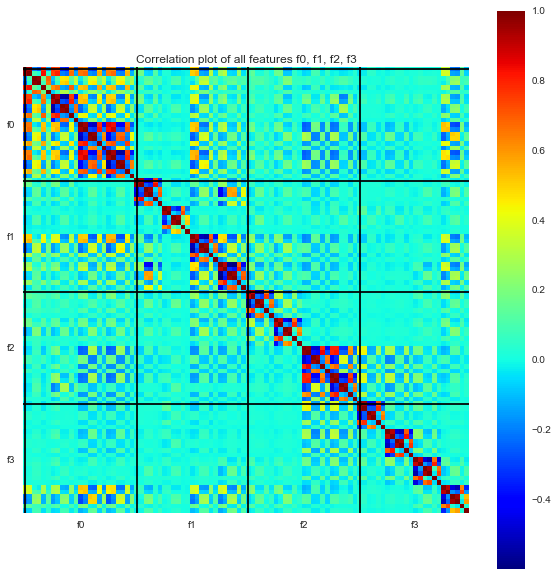

In [23]:
# Compute feature correlation matrix
R = np.corrcoef(list_of_features,rowvar=0)
# R_normalize = np.corrcoef(normalize_features, rowvar=0)
fig = plt.figure(figsize=(10,10))
plt.imshow(R, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Correlation plot of all features f0, f1, f2, f3")
plt.colorbar()

plt.xticks(np.arange(12,96, 24), ['f0', 'f1', 'f2', 'f3'])
plt.yticks(np.arange(12,96, 24), ['f0', 'f1', 'f2', 'f3'])
ax = plt.gca()
ax.grid(False)
xmin = ax.get_xlim

yline = np.arange(0, 96, 24)
for i in range(0, len(yline)):
    plt.axhline(y=yline[i], color='k')
    plt.axvline(x=yline[i], color='k')

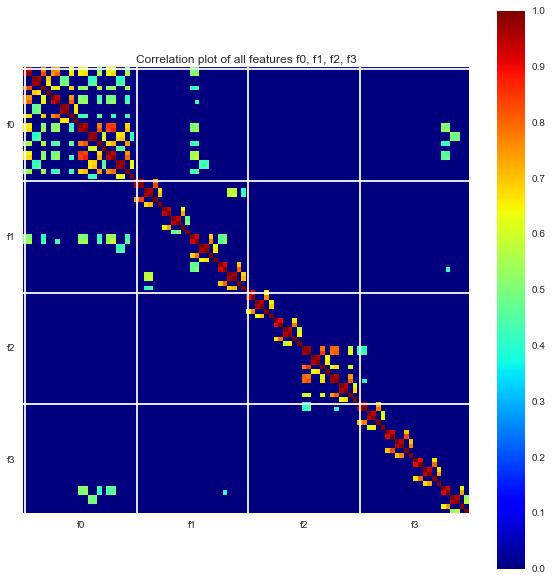

In [24]:
temp = R
temp = temp < 0.4
buff = R
buff[temp] = 0
fig = plt.figure(figsize=(10,10))
plt.imshow(buff, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Correlation plot of all features f0, f1, f2, f3")
plt.colorbar()
plt.xticks(np.arange(12,96, 24), ['f0', 'f1', 'f2', 'f3'])
plt.yticks(np.arange(12,96, 24), ['f0', 'f1', 'f2', 'f3'])
ax = plt.gca()
ax.grid(False)
xmin = ax.get_xlim

yline = np.arange(0, 96, 24)
for i in range(0, len(yline)):
    plt.axhline(y=yline[i], color='w')
    plt.axvline(x=yline[i], color='w')

In [9]:
# Run k-means and plot
y_pred = KMeans(n_clusters=10).fit_predict(list_of_features)


In [25]:
test = MiniBatchKMeans(n_clusters=50).fit(list_of_features)

In [35]:
test2 = MiniBatchKMeans(n_clusters=50).fit(list_of_features.T)

(50, 96)


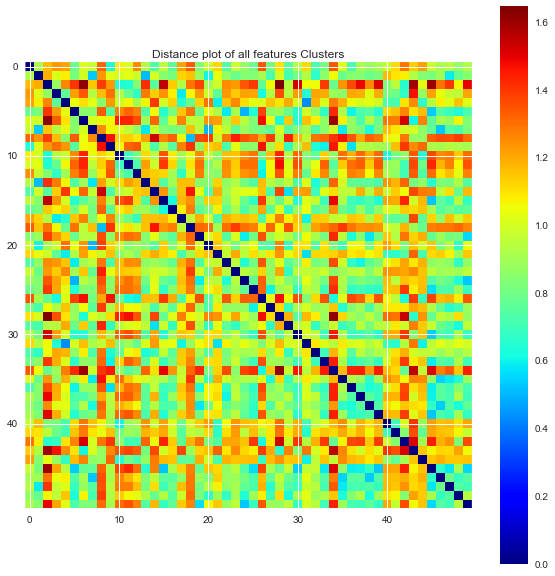

In [26]:
# compute distances between each centroid
centroids = test.cluster_centers_
print centroids.shape
distances = scipy.spatial.distance.pdist(centroids)
distances = scipy.spatial.distance.squareform(distances)

# Plot the distances
fig = plt.figure(figsize=(10,10))
plt.imshow(distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Distance plot of all features Clusters")
plt.colorbar()

# Inferential Simulation part 2

## Formal Simulated Inference
1. Define F (i.e. your model and assumptions)
2. Formalize test
3. Describe test statistic
4. A) Sample data from F∈ℱ0
4. B) Sample data from F∈ℱA
5. Plot power vs n (i.e. perspective power analysis)
6. Apply to data

**Assumptions:**
We want to create a statistical model for our data and simulate a prospective power analysis. We take our dataset, ${x1_i, ..., x24_i}$ that are drawn i.i.d. from $F_{x1,...,x24}$, which belongs to a family of distributions. 

Our 24 variables represent the 24 different proteins being expressed and measured for a set of 6 metrics ${f_0,...,f_5}$

1. Our other data is <x,y,z> coordinates of each row in our feature matrix (e.g. each synapse, or measurement that we have). One hypothesis that we can test initially as a sanity check is if our data is uniformly distributed in space? 
For each row i in normalized location data matrix D(x,y,z):

    $D_i(x), D_i(y), D_i(z) \in U$, where U represents a uniform distribution [0,1]
    
    Our alternative would be that they do not.
    

**Formalize A Test:**

$$H_o: D_i \in U \ \forall \ i \in {x,y,z}$$
$$H_a: \exists i \in {x,y,z} \ s.t. D_i \not \in U$$

**Describe Test Statistic:**
How are we getting a test statistic for our null and alternative hypothesis test? 

The Kolmogorov-Smirnov test is a **nonparametric test** of the equality of 1-D pdfs to compare a sample with a reference pdf. It quantifies a distance between the empirical distribution of the sample and the cdf of the reference distribution (in this case, the uniform distribution).

The empirical distribution function $F_n$ for n iid observationss is:
    $$F_n(x) = \frac{1}{n} * \sum_{i=1}^n(I_{[-\infty,x]} \ (X_i))$$
    
where $I_{[-\infty,x]} \ (X_i) $ is the indicator function $= \cases {{1 \ if \ X_i \leqslant x}, \\ {0 \ otherwise}}$

The Kolmogorov-Smirnov statistic is $D_n = \sup_{x}|F_n(x) - F(x)|$ and $F(x)$ is a given distribution we want to test against, namely the uniform distribution.


**Sample from Null and Alternative Distribution:**
The choice of the magnitude of the null/alternative differences will affect the power because it affects the overlap of the distributions. If you can't analytically formulate your distribution for test statistics, then you will need to somehow get an estimate of your distributions instead. You can simulate samples many many times.

# STEP 4A Sample Data From Null

In [46]:
# define number of subjects per class
np.random.seed(123456789)  # for reproducibility, set random seed

S = np.array((4, 6, 8, 10, 14, 18, 20, 26, 30, 40,
              50, 60, 70, 80, 100, 120, 150, 200, 250,
              300, 400, 500, 750, 1000, 1500, 2000,
              3000, 5000))
alpha = 0.05
N = 50 # # samples at each iteration

In [59]:
pow_null = np.array((), dtype=np.dtype('float64'))
powks_null = np.array((), dtype=np.dtype('float64'))
powks2_null = np.array((), dtype=np.dtype('float64'))

# compute this statistic for various sizes of datasets
for s in S:
    # compute this many times for each operating point to get average
    pval = np.array((), dtype=np.dtype('float64')) 
    kspval = np.array((), dtype=np.dtype('float64')) 
    ks2pval = np.array((), dtype=np.dtype('float64')) 
    
    for _ in itertools.repeat(None,N):
        g0 = np.random.uniform(0, 1, s) # (null)
        g1 = np.random.uniform(0, 1, s) # null
        
        # compute Kolmogorov-test statistic on generated data
        ks2test_stat = scipy.stats.ks_2samp(g0, g1)
        ks2pval = np.append(pval, ks2test_stat.pvalue)
        
        kstest_stat = scipy.stats.kstest(g0, 'uniform', args=(0,1))
        kspval = np.append(pval, kstest_stat.pvalue)
        
        # Wilcoxon
        test_stat = scipy.stats.wilcoxon(g0, g1)
        pval = np.append(pval, test_stat.pvalue)
        
        
    
    # record average p value at operating point
    pow_null = np.append(pow_null, np.sum(1.0*(pval < alpha))/N)
    
    powks_null = np.append(powks_null, np.sum(1.0*(kspval < alpha))/N)
    powks2_null = np.append(powks2_null, np.sum(1.0*(ks2pval < alpha))/N)

# STEP 4B Sample Data From Alternative

In [62]:
pow_alt = np.array((), dtype=np.dtype('float64'))
powks_alt = np.array((), dtype=np.dtype('float64'))
powks2_alt = np.array((), dtype=np.dtype('float64'))

# compute this statistic for various sizes of datasets
for s in S:

    # compute this many times for each operating point to get average
    pval = np.array((), dtype=np.dtype('float64'))    
    kspval = np.array((), dtype=np.dtype('float64')) 
    ks2pval = np.array((), dtype=np.dtype('float64')) 
    
    for _ in itertools.repeat(None,N):
        g0 = np.random.uniform(0.2, 0.9, s) # (null)
        g1 = np.random.uniform(0, 1, s) # alternative
        
        # compute Kolmogorov-test statistic on generated data
        ks2test_stat = scipy.stats.ks_2samp(g0, g1)
        ks2pval = np.append(pval, ks2test_stat.pvalue)
        
        kstest_stat = scipy.stats.kstest(g0, 'uniform', args=(0,1))
        kspval = np.append(pval, kstest_stat.pvalue)
        
        # Wilcoxon
        test_stat = scipy.stats.wilcoxon(g0, g1)
        pval = np.append(pval, test_stat.pvalue)
        
    # record average p value at operating point
    pow_alt = np.append(pow_alt, np.sum(1.0*(pval < alpha))/N)
    powks_alt = np.append(powks_alt, np.sum(1.0*(kspval < alpha))/N)
    powks2_alt = np.append(powks2_alt, np.sum(1.0*(ks2pval < alpha))/N)

# STEP 5 Plot Power vs. n On Null Set

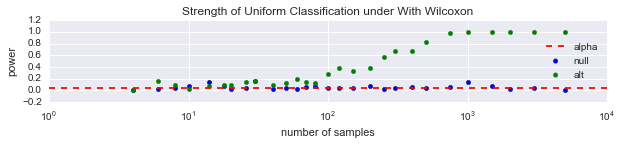

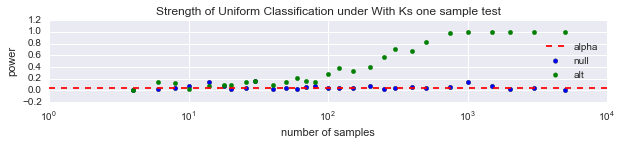

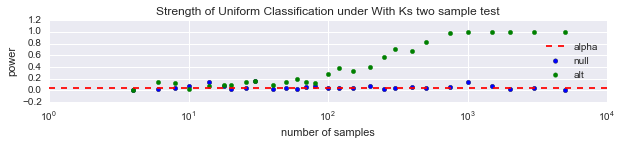

In [63]:
# Plotting power vs. n on the null set
fig = plt.figure(figsize=(10,5))
plt.subplot(311)
plt.scatter(S, pow_null, hold=True, label='null')
plt.scatter(S, pow_alt, color='green', hold=True, label='alt')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('power')
plt.title('Strength of Uniform Classification under With Wilcoxon')
plt.axhline(alpha, color='red', linestyle='--', label='alpha')
plt.legend(loc=5)
plt.show()

# Plotting power vs. n on the null set
fig = plt.figure(figsize=(10,5))
plt.subplot(312)
plt.scatter(S, powks_null, hold=True, label='null')
plt.scatter(S, powks_alt, color='green', hold=True, label='alt')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('power')
plt.title('Strength of Uniform Classification under With Ks one sample test')
plt.axhline(alpha, color='red', linestyle='--', label='alpha')
plt.legend(loc=5)
plt.show()

# Plotting power vs. n on the null set
fig = plt.figure(figsize=(10,5))
plt.subplot(313)
plt.scatter(S, powks2_null, hold=True, label='null')
plt.scatter(S, powks2_alt, color='green', hold=True, label='alt')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('power')
plt.title('Strength of Uniform Classification under With Ks two sample test')
plt.axhline(alpha, color='red', linestyle='--', label='alpha')
plt.legend(loc=5)
plt.show()

# STEP 6 Actual Data
Now we run our test statistics on our actual location normalized data.

Run 01A, or 01B to see the analysis done on either normalized, or regular data.

In [64]:
# 01A

#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# read in normalized data locations
csvfile = "data_normalized/locations_normalized.txt"

# load in the feature data
list_of_locations = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# convert to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [67]:
# 01B

#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
#### this is only to run for non-normalized to see if we get the same results
csvfile = "data/synapsinR_7thA.tif.Pivots.txt"

# load in the feature data
list_of_locations = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# convert to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [68]:
# run Komogorove-Smirnov Test 
x_locations = list_of_locations[:,0]
y_locations = list_of_locations[:,1]
z_locations = list_of_locations[:,2]

# Ks 1 sample test
test_x = scipy.stats.kstest(x_locations, 'uniform', args=(min(x_locations),max(x_locations)))
test_y = scipy.stats.kstest(y_locations, 'uniform', args=(min(y_locations),max(y_locations)))
test_z = scipy.stats.kstest(z_locations, 'uniform', args=(min(z_locations),max(z_locations)))

g0 = np.random.uniform(0, 1, len(x_locations)) # (null)

# ks_2sample test
# test_x = scipy.stats.ks_2samp(x_locations, g0)
# test_y = scipy.stats.ks_2samp(y_locations, g0)
# test_z = scipy.stats.ks_2samp(z_locations, g0)

print test_x
print test_y
print test_z

KstestResult(statistic=0.08121982036477704, pvalue=0.0)
KstestResult(statistic=0.061234766392988749, pvalue=0.0)
KstestResult(statistic=0.070538814918980508, pvalue=0.0)


## Plotting Data
Now that we have finished the kolmogorov test of our data, we see that all three columns of our normalized location data does not come from uniformly distribution. 

We want to plot our data, but be wary that although it looks uniform, we reject that hypothesis with sufficiently high power.

<function matplotlib.pyplot.tight_layout>

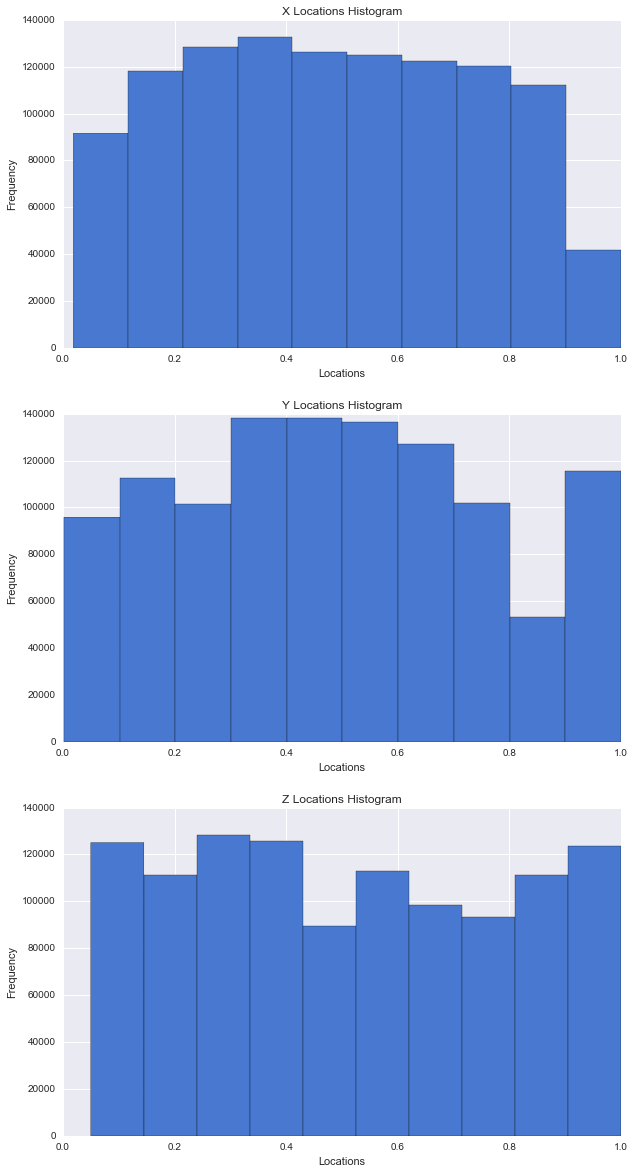

In [31]:
fig = plt.figure(figsize=(10,20))
fig.add_subplot(311)
plt.hist(x_locations)
plt.title("X Locations Histogram")
plt.xlabel("Locations")
plt.ylabel("Frequency")

fig.add_subplot(312)
plt.hist(y_locations)
plt.title("Y Locations Histogram")
plt.xlabel("Locations")
plt.ylabel("Frequency")

fig.add_subplot(313)
plt.hist(z_locations)
plt.title("Z Locations Histogram")
plt.xlabel("Locations")
plt.ylabel("Frequency")
plt.tight_layout

# Discussion
After simulating the Kolmogorov-Smirnov test statistic, it shows that the null increases to 1, so we end up rejecting the null incorrectly all the time? 

It is shown here that the Kolmogorov one sample, two sample, or Wilcoxon signed-rank test can be used for testing if our data comes from uniform distribution [0,1]. Even against alternative hypotheses with close to uniform [0,1] (e.g. [0.2, 0.9], can have sufficiently high power with the amount of samples we have. 

Therefore when we reject our null hypotheses, we see that our data is not uniformly distributed in space, even though it looks like it is when we plot our histograms.